Este proceso de dataset es para el modelo de trabajo Static Peruvian Sign Language Classifier Based on Manual Spelling Using a Convolutional Neural Network de los autores Gerardo Portocarrero-Banda1, Eveling Gloria Castro-Gutierrez, Abdel Alejandro Portocarrero-Banda, Claudia Acra-Despradel, David Rondon, Hugo Guillermo Jimenez-Pacheco and Miguel Angel Ortiz-Esparza. El trabajo se puede encontrar en el siguiente link: https://ceur-ws.org/Vol-3693/paper17.pdf

Las caracteristicas del dataset son las siguientes:
- Origen: Imágenes de señas estáticas del alfabeto de la Lengua de Señas Peruana (PSL)
- Clases:
  - 24 letras del alfabeto PSL.
  - 1 clase adicional "nothing" (gestos o imágenes que no corresponden a ninguna seña PSL, para diferenciar gestos externos).
- Distribución:
  - Entrenamiento: 63%
  - Validación: 7%
  - Prueba: 30%
- Frames por clase: 121 frames por cada letra estática.

El preprocesamiento:
1. Cambio de modelo de color
  - Conversión de RGB → YCbCr para separar cromaticidad y luminancia, facilitando la detección de piel en condiciones de iluminación variable.
  - Componentes:
    - Y: luminancia (brillo)
    - Cb: diferencia de color azul
    - Cr: diferencia de color rojo
  - Fórmulas (valores normalizados R’, G’, B’ ∈ [0,1]):
    - Y=16+(65.481⋅R′+128.553⋅G′+24.966⋅B′)
    - Cb=128+(−37.797⋅R′−74.203⋅G′+112.0⋅B′)
    - Cr=128+(112.0⋅R′−93.786⋅G′−18.214⋅B′)
2. Detección de color de piel
  - Un píxel se considera piel si:
$$
0 < Y < 255 \\
133 < C_b < 173 \\
77 < C_r < 127
$$
  - Esto filtra el resto del entorno, reduciendo ruido (ej. gafas, joyas, objetos de fondo).
3. Cambio de resolución
  - Todas las imágenes se redimensionan a 224 × 224 píxeles.
4. Normalización
  - Escalado de valores de píxel a rango [0,1] dividiendo entre 255.
  - Permite un dataset más ligero y manejable.

# Cargar Dataset


In [1]:
import cv2
import numpy as np
import os

In [2]:
# Variables a considerar
IMG_SIZE = 224
DATASET_PATH = os.path.abspath(
    os.path.join(os.getcwd(), "..", "Static-Hand-Gestures-of-the-Peruvian-Sign-Language-Alphabet-master")
)

OUTPUT_PATH = os.path.abspath(
    os.path.join(os.getcwd(), "datasets", "Static-Hand-Gestures-Alphabet-ThinkName")
)

# Rango de piel en YCbCr
# lower_skin = np.array([0, 133, 77], dtype=np.uint8)
# upper_skin = np.array([255, 173, 127], dtype=np.uint8)

# Rango de piel en YCrCb
lower_skin = np.array([0, 133, 77], dtype=np.uint8)
upper_skin = np.array([255, 173, 127], dtype=np.uint8)

print("Dataset path:", DATASET_PATH)
print("Output path:", OUTPUT_PATH)


Dataset path: c:\Users\sebas\Documents\Programacion\project\TraductorLSP\AI_Development\Static-Hand-Gestures-of-the-Peruvian-Sign-Language-Alphabet-master
Output path: c:\Users\sebas\Documents\Programacion\project\TraductorLSP\AI_Development\CreateDataSets\datasets\Static-Hand-Gestures-Alphabet-ThinkName


In [ ]:
# def preprocess_image(image):
#     # 1. Convertir RGB → YCbCr
#     ycbcr = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)  

#     # OpenCV usa orden Y,Cr,Cb → reordenamos para Y,Cb,Cr
#     Y, Cr, Cb = cv2.split(ycbcr)
#     ycbcr = cv2.merge([Y, Cb, Cr])

#     # 2. Segmentación de piel con máscara
#     mask = cv2.inRange(ycbcr, lower_skin, upper_skin)
#     # Verificar valores de la mascara
#     print("Mask unique values:", np.unique(mask))
#     skin = cv2.bitwise_and(image, image, mask=mask)


#     # 3. Redimensionar a 224x224
#     resized = cv2.resize(skin, (IMG_SIZE, IMG_SIZE))

#     # 4. Normalizar valores de píxel [0,1]
#     normalized = resized.astype("float32") / 255.0

#     return normalized

def preprocess_image(image):
    # 1. Convertir BGR → YCrCb (así lo maneja OpenCV)
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # 2. Segmentación de piel con máscara
    mask = cv2.inRange(ycrcb, lower_skin, upper_skin)
    # print("Mask unique values:", np.unique(mask))
    skin = cv2.bitwise_and(image, image, mask=mask)

    # 3. Redimensionar
    resized = cv2.resize(skin, (IMG_SIZE, IMG_SIZE))

    # 4. Normalizar
    normalized = resized.astype("float32") / 255.0

    return normalized

In [4]:
def process_dataset():
    if not os.path.exists(OUTPUT_PATH):
        os.makedirs(OUTPUT_PATH)

    for class_name in os.listdir(DATASET_PATH):
        class_path = os.path.join(DATASET_PATH, class_name)
        if not os.path.isdir(class_path):
            continue

        output_class_path = os.path.join(OUTPUT_PATH, class_name)
        os.makedirs(output_class_path, exist_ok=True)
        print(output_class_path)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            image = cv2.imread(img_path)

            if image is None:
                continue

            processed = preprocess_image(image)

            # Guardar imagen preprocesada como .npy
            out_name = os.path.splitext(img_name)[0] + ".npy"
            np.save(os.path.join(output_class_path, out_name), processed)

        print(f"[OK] Clase {class_name} procesada.")

In [5]:
process_dataset()

c:\Users\sebas\Documents\Programacion\project\TraductorLSP\AI_Development\CreateDataSets\datasets\Static-Hand-Gestures-Alphabet-ThinkName\a
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: [  0 255]
Mask unique values: 

Mask unique values: [  0 255]
Shape: (224, 224, 3)
Min: 0.0 Max: 0.69803923 Mean: 0.08871253


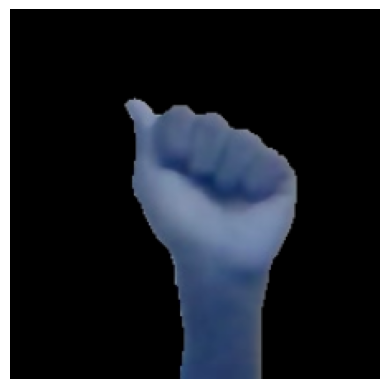

In [6]:
import cv2, matplotlib.pyplot as plt

img = cv2.imread(r"C:\Users\sebas\Documents\Programacion\project\TraductorLSP\AI_Development\Static-Hand-Gestures-of-the-Peruvian-Sign-Language-Alphabet-master\a\a (10).jpg")

processed = preprocess_image(img)

print("Shape:", processed.shape)
print("Min:", processed.min(), "Max:", processed.max(), "Mean:", processed.mean())

plt.imshow(processed)
plt.axis("off")
plt.show()